In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.get_backend()
import re

%matplotlib notebook

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000

In [2]:
df = pd.read_csv('datasets/UEFA_CL_Player_stats.csv')
#df.columns=[x.lower().strip() for x in df.columns]
df.head()

,Unnamed: 0,name,season,season year,team,rating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,appearances,substitutionsIn,substitutionsOut
0,0,Robin van Persie,Champions League 13/14,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
1,1,Ashley Cole,Champions League 13/14,13/14,chelsea,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5,0.0,1.0
2,2,José Antonio Reyes,UEFA Champions League 15/16,15/16,sevilla,7.25,0,0.0,1.0,0.0,0.0,58.0,26.0,84.0,69.047619,18.0,42.0,27.0,2.0,1.0,50.0,1.0,4.0,1.0,NaN,0.0,2.0,28.571429,2.0,0.0,2.0,6.0,60.0,6.0,42.857143,12.0,50.0,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,4.0,50.0,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,7.0,12.0,8.0,0.0,0.0,0.0,8.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,23.0,68.0,NaN,2,NaN,NaN
3,3,Roman Weidenfeller,Champions League 13/14,13/14,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,9,0.0,0.0
4,4,Roman Weidenfeller,Champions League 14/15,14/15,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
print(df.shape)

(5733, 109)


In [9]:
df.columns

Index(['Unnamed: 0', 'name', 'season', 'season year', 'team', 'rating',
       'goals', 'bigChancesCreated', 'bigChancesMissed', 'assists',
       ...
       'scoringFrequency', 'yellowRedCards', 'savesCaught', 'savesParried',
       'totalOwnHalfPasses', 'totalOppositionHalfPasses', 'totwAppearances',
       'appearances', 'substitutionsIn', 'substitutionsOut'],
      dtype='object', length=109)

In [10]:
df=print(df.columns)

Index(['Unnamed: 0', 'name', 'season', 'season year', 'team', 'rating',
       'goals', 'bigChancesCreated', 'bigChancesMissed', 'assists',
       ...
       'scoringFrequency', 'yellowRedCards', 'savesCaught', 'savesParried',
       'totalOwnHalfPasses', 'totalOppositionHalfPasses', 'totwAppearances',
       'appearances', 'substitutionsIn', 'substitutionsOut'],
      dtype='object', length=109)


In [13]:
# lets change all the columns to lower case

cols=list(df.columns)
cols = [ x.lower().strip() for x in cols]
df.columns=cols
df.head()

,unnamed: 0,name,season,season year,team,rating,goals,bigchancescreated,bigchancesmissed,assists,goalsassistssum,accuratepasses,inaccuratepasses,totalpasses,accuratepassespercentage,accurateownhalfpasses,accurateoppositionhalfpasses,accuratefinalthirdpasses,keypasses,successfuldribbles,successfuldribblespercentage,tackles,interceptions,yellowcards,directredcards,redcards,accuratecrosses,accuratecrossespercentage,totalshots,shotsontarget,shotsofftarget,groundduelswon,groundduelswonpercentage,aerialduelswon,aerialduelswonpercentage,totalduelswon,totalduelswonpercentage,minutesplayed,goalconversionpercentage,penaltiestaken,penaltygoals,penaltywon,penaltyconceded,shotfromsetpiece,freekickgoal,goalsfrominsidethebox,goalsfromoutsidethebox,shotsfrominsidethebox,shotsfromoutsidethebox,headedgoals,leftfootgoals,rightfootgoals,accuratelongballs,accuratelongballspercentage,clearances,errorleadtogoal,errorleadtoshot,dispossessed,possessionlost,possessionwonattthird,totalchippedpasses,accuratechippedpasses,touches,wasfouled,fouls,hitwoodwork,owngoals,dribbledpast,offsides,blockedshots,passtoassist,saves,cleansheet,penaltyfaced,penaltysave,savedshotsfrominsidethebox,savedshotsfromoutsidethebox,goalsconcededinsidethebox,goalsconcededoutsidethebox,punches,runsout,successfulrunsout,highclaims,crossesnotclaimed,matchesstarted,penaltyconversion,setpiececonversion,totalattemptassist,totalcontest,totalcross,duellost,aeriallost,attemptpenaltymiss,attemptpenaltypost,attemptpenaltytarget,totallongballs,goalsconceded,tackleswon,tackleswonpercentage,scoringfrequency,yellowredcards,savescaught,savesparried,totalownhalfpasses,totaloppositionhalfpasses,totwappearances,appearances,substitutionsin,substitutionsout
0,0,Robin van Persie,Champions League 13/14,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
1,1,Ashley Cole,Champions League 13/14,13/14,chelsea,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5,0.0,1.0
2,2,José Antonio Reyes,UEFA Champions League 15/16,15/16,sevilla,7.25,0,0.0,1.0,0.0,0.0,58.0,26.0,84.0,69.047619,18.0,42.0,27.0,2.0,1.0,50.0,1.0,4.0,1.0,NaN,0.0,2.0,28.571429,2.0,0.0,2.0,6.0,60.0,6.0,42.857143,12.0,50.0,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,4.0,50.0,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,7.0,12.0,8.0,0.0,0.0,0.0,8.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,23.0,68.0,NaN,2,NaN,NaN
3,3,Roman Weidenfeller,Champions League 13/14,13/14,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,9,0.0,0.0
4,4,Roman Weidenfeller,Champions League 14/15,14/15,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [14]:
r= "UEFA Champions League 13/14"

re.findall('([\w]+\s)\w+\s',r)

['UEFA ']

In [15]:
df['season']=df['season'].str.extract('([\w]+\s)\w+\s')
df.head()


,unnamed: 0,name,season,season year,team,rating,goals,bigchancescreated,bigchancesmissed,assists,goalsassistssum,accuratepasses,inaccuratepasses,totalpasses,accuratepassespercentage,accurateownhalfpasses,accurateoppositionhalfpasses,accuratefinalthirdpasses,keypasses,successfuldribbles,successfuldribblespercentage,tackles,interceptions,yellowcards,directredcards,redcards,accuratecrosses,accuratecrossespercentage,totalshots,shotsontarget,shotsofftarget,groundduelswon,groundduelswonpercentage,aerialduelswon,aerialduelswonpercentage,totalduelswon,totalduelswonpercentage,minutesplayed,goalconversionpercentage,penaltiestaken,penaltygoals,penaltywon,penaltyconceded,shotfromsetpiece,freekickgoal,goalsfrominsidethebox,goalsfromoutsidethebox,shotsfrominsidethebox,shotsfromoutsidethebox,headedgoals,leftfootgoals,rightfootgoals,accuratelongballs,accuratelongballspercentage,clearances,errorleadtogoal,errorleadtoshot,dispossessed,possessionlost,possessionwonattthird,totalchippedpasses,accuratechippedpasses,touches,wasfouled,fouls,hitwoodwork,owngoals,dribbledpast,offsides,blockedshots,passtoassist,saves,cleansheet,penaltyfaced,penaltysave,savedshotsfrominsidethebox,savedshotsfromoutsidethebox,goalsconcededinsidethebox,goalsconcededoutsidethebox,punches,runsout,successfulrunsout,highclaims,crossesnotclaimed,matchesstarted,penaltyconversion,setpiececonversion,totalattemptassist,totalcontest,totalcross,duellost,aeriallost,attemptpenaltymiss,attemptpenaltypost,attemptpenaltytarget,totallongballs,goalsconceded,tackleswon,tackleswonpercentage,scoringfrequency,yellowredcards,savescaught,savesparried,totalownhalfpasses,totaloppositionhalfpasses,totwappearances,appearances,substitutionsin,substitutionsout
0,0,Robin van Persie,Champions,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
1,1,Ashley Cole,Champions,13/14,chelsea,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5,0.0,1.0
2,2,José Antonio Reyes,UEFA,15/16,sevilla,7.25,0,0.0,1.0,0.0,0.0,58.0,26.0,84.0,69.047619,18.0,42.0,27.0,2.0,1.0,50.0,1.0,4.0,1.0,NaN,0.0,2.0,28.571429,2.0,0.0,2.0,6.0,60.0,6.0,42.857143,12.0,50.0,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,4.0,50.0,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,7.0,12.0,8.0,0.0,0.0,0.0,8.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,23.0,68.0,NaN,2,NaN,NaN
3,3,Roman Weidenfeller,Champions,13/14,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,9,0.0,0.0
4,4,Roman Weidenfeller,Champions,14/15,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
#replace the data in season column with chiampions league
df['season'] = 'Champions league'
df.head()
#df.replace(['Champions','UEFA'],['webb','web'])
#df.head()
#df.replace(to_replace=".*Champions", value="Champions league", regex=True).head()
#df.replace(to_replace=".*UEFA", value="web",regex=True).head()

,unnamed: 0,name,season,season year,team,rating,goals,bigchancescreated,bigchancesmissed,assists,goalsassistssum,accuratepasses,inaccuratepasses,totalpasses,accuratepassespercentage,accurateownhalfpasses,accurateoppositionhalfpasses,accuratefinalthirdpasses,keypasses,successfuldribbles,successfuldribblespercentage,tackles,interceptions,yellowcards,directredcards,redcards,accuratecrosses,accuratecrossespercentage,totalshots,shotsontarget,shotsofftarget,groundduelswon,groundduelswonpercentage,aerialduelswon,aerialduelswonpercentage,totalduelswon,totalduelswonpercentage,minutesplayed,goalconversionpercentage,penaltiestaken,penaltygoals,penaltywon,penaltyconceded,shotfromsetpiece,freekickgoal,goalsfrominsidethebox,goalsfromoutsidethebox,shotsfrominsidethebox,shotsfromoutsidethebox,headedgoals,leftfootgoals,rightfootgoals,accuratelongballs,accuratelongballspercentage,clearances,errorleadtogoal,errorleadtoshot,dispossessed,possessionlost,possessionwonattthird,totalchippedpasses,accuratechippedpasses,touches,wasfouled,fouls,hitwoodwork,owngoals,dribbledpast,offsides,blockedshots,passtoassist,saves,cleansheet,penaltyfaced,penaltysave,savedshotsfrominsidethebox,savedshotsfromoutsidethebox,goalsconcededinsidethebox,goalsconcededoutsidethebox,punches,runsout,successfulrunsout,highclaims,crossesnotclaimed,matchesstarted,penaltyconversion,setpiececonversion,totalattemptassist,totalcontest,totalcross,duellost,aeriallost,attemptpenaltymiss,attemptpenaltypost,attemptpenaltytarget,totallongballs,goalsconceded,tackleswon,tackleswonpercentage,scoringfrequency,yellowredcards,savescaught,savesparried,totalownhalfpasses,totaloppositionhalfpasses,totwappearances,appearances,substitutionsin,substitutionsout
0,0,Robin van Persie,Champions league,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
1,1,Ashley Cole,Champions league,13/14,chelsea,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5,0.0,1.0
2,2,José Antonio Reyes,Champions league,15/16,sevilla,7.25,0,0.0,1.0,0.0,0.0,58.0,26.0,84.0,69.047619,18.0,42.0,27.0,2.0,1.0,50.0,1.0,4.0,1.0,NaN,0.0,2.0,28.571429,2.0,0.0,2.0,6.0,60.0,6.0,42.857143,12.0,50.0,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,4.0,50.0,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,7.0,12.0,8.0,0.0,0.0,0.0,8.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,23.0,68.0,NaN,2,NaN,NaN
3,3,Roman Weidenfeller,Champions league,13/14,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,9,0.0,0.0
4,4,Roman Weidenfeller,Champions league,14/15,borussia-dortmund,NaN,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0

In [17]:
#missing_value=df.isna().sum().sort_values(ascending=False)/len(df)
#missing_value

In [18]:
df.columns

Index(['unnamed: 0', 'name', 'season', 'season year', 'team', 'rating',
       'goals', 'bigchancescreated', 'bigchancesmissed', 'assists',
       ...
       'scoringfrequency', 'yellowredcards', 'savescaught', 'savesparried',
       'totalownhalfpasses', 'totaloppositionhalfpasses', 'totwappearances',
       'appearances', 'substitutionsin', 'substitutionsout'],
      dtype='object', length=109)

In [19]:
columns_to_use = ['name', 'season', 'season year','team','rating','goals','assists','totalpasses','accuratepassespercentage',
                  'successfuldribbles','totalshots','shotsontarget','minutesplayed','fouls','appearances',
                 'yellowcards','redcards',]

uefa_df=df[columns_to_use]
uefa_df.head()

,name,season,season year,team,rating,goals,assists,totalpasses,accuratepassespercentage,successfuldribbles,totalshots,shotsontarget,minutesplayed,fouls,appearances,yellowcards,redcards
0,Robin van Persie,Champions league,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6,NaN,NaN
1,Ashley Cole,Champions league,13/14,chelsea,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,414,NaN,5,1.0,0.0
2,José Antonio Reyes,Champions league,15/16,sevilla,7.25,0,0.0,84.0,69.047619,1.0,2.0,0.0,162,2.0,2,1.0,0.0
3,Roman Weidenfeller,Champions league,13/14,borussia-dortmund,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,765,NaN,9,0.0,1.0
4,Roman Weidenfeller,Champions league,14/15,borussia-dortmund,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,630,NaN,7,0.0,0.0


In [20]:

uefa_df=uefa_df.rename(columns={'season':'tournament','totalpasses':'total passes','accuratepassespercentage':'accurate passes%',
                            'successdribbles':'success dribbles','totalshots':'total shots','shotsontarget':'shots on target',
                            'minutesplayed':'minutes played'})
uefa_df.head()

,name,tournament,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
0,Robin van Persie,Champions league,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6,NaN,NaN
1,Ashley Cole,Champions league,13/14,chelsea,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,414,NaN,5,1.0,0.0
2,José Antonio Reyes,Champions league,15/16,sevilla,7.25,0,0.0,84.0,69.047619,1.0,2.0,0.0,162,2.0,2,1.0,0.0
3,Roman Weidenfeller,Champions league,13/14,borussia-dortmund,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,765,NaN,9,0.0,1.0
4,Roman Weidenfeller,Champions league,14/15,borussia-dortmund,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,630,NaN,7,0.0,0.0


In [21]:
uefa_df=uefa_df.set_index('tournament')
uefa_df.head()

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Robin van Persie,13/14,manchester-united,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6,NaN,NaN
Champions league,Ashley Cole,13/14,chelsea,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,414,NaN,5,1.0,0.0
Champions league,José Antonio Reyes,15/16,sevilla,7.25,0,0.0,84.0,69.047619,1.0,2.0,0.0,162,2.0,2,1.0,0.0
Champions league,Roman Weidenfeller,13/14,borussia-dortmund,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,765,NaN,9,0.0,1.0
Champions league,Roman Weidenfeller,14/15,borussia-dortmund,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,630,NaN,7,0.0,0.0


In [22]:
#getting the missing value

missing_percent = uefa_df.isna().sum().sort_values()/len(uefa_df)*100
missing_percent

name                   0.000000
season year            0.000000
team                   0.000000
goals                  0.000000
minutes played         0.000000
appearances            0.000000
assists                1.709402
yellowcards            1.709402
redcards               1.709402
rating                29.024943
total passes          29.024943
accurate passes%      29.024943
successfuldribbles    29.024943
total shots           29.024943
shots on target       29.024943
fouls                 29.024943
dtype: float64

<IPython.core.display.Javascript object>


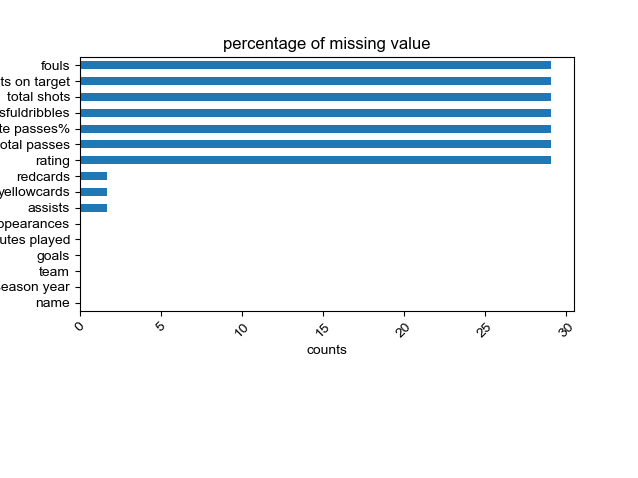

In [23]:
missing_percent.plot.barh()
#set_Xlabel("percentage")
plt.gca().set_ylabel("percentage")
plt.gca().set_xlabel("counts")
plt.gca().set_title("percentage of missing value")

x=plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

plt.subplots_adjust(bottom=0.35)

In [24]:
#to fill in yhe missing value
uefa_df.fillna(0,inplace=True)
uefa_df.head()

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Robin van Persie,13/14,manchester-united,0.00,4,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,6,0.0,0.0
Champions league,Ashley Cole,13/14,chelsea,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,414,0.0,5,1.0,0.0
Champions league,José Antonio Reyes,15/16,sevilla,7.25,0,0.0,84.0,69.047619,1.0,2.0,0.0,162,2.0,2,1.0,0.0
Champions league,Roman Weidenfeller,13/14,borussia-dortmund,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,765,0.0,9,0.0,1.0
Champions league,Roman Weidenfeller,14/15,borussia-dortmund,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,630,0.0,7,0.0,0.0


In [25]:
uefa_df.describe()

,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
count,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.00000,5733.000000,5733.000000
mean,4.772776,0.504622,0.316239,115.758765,56.424830,2.457701,2.337520,1.109716,323.625676,2.847549,4.62899,0.645735,0.031223
std,3.144455,1.207323,0.738208,146.984204,37.878496,4.758307,4.539005,2.531104,251.248743,3.843247,2.76845,0.899667,0.173934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.000000,0.000000,2.00000,0.000000,0.000000
50%,6.600000,0.000000,0.000000,62.000000,76.804124,0.000000,0.000000,0.000000,270.000000,1.000000,4.00000,0.000000,0.000000
75%,6.925000,1.000000,0.000000,179.000000,85.166240,3.000000,3.000000,1.000000,490.000000,5.000000,6.00000,1.000000,0.000000
max,9.700000,17.000000,8.000000,980.000000,100.000000,57.000000,69.000000,39.000000,1230.000000,36.000000,13.00000,6.000000,1.000000


In [26]:
#top 15 highest goals scorer from season 2013/2014 to 2017/2018
highest_goals=uefa_df.groupby('name',as_index=False)['goals'].sum().nlargest(15,'goals')
highest_goals.head(15)

,name,goals
497,Cristiano Ronaldo,80
1509,Lionel Messi,59
2237,Robert Lewandowski,59
1367,Karim Benzema,36
1965,Neymar,35
2387,Sergio Agüero,32
711,Edinson Cavani,30
2556,Thomas Müller,30
1888,Mohamed Salah,27
1560,Luis Suárez,25


<IPython.core.display.Javascript object>


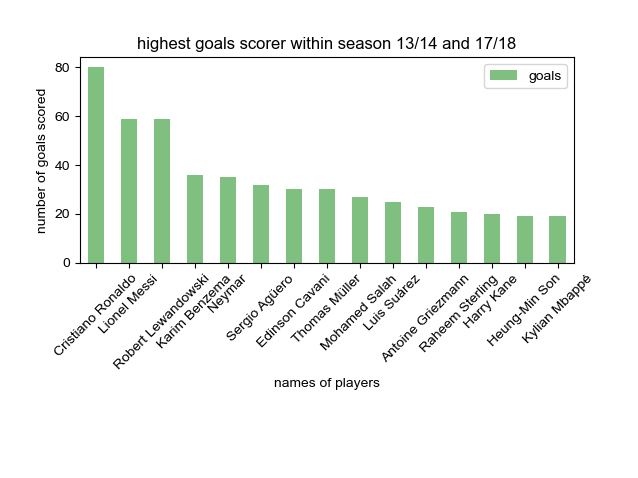

Text(0.5, 1.0, 'highest goals scorer within season 13/14 and 17/18')

In [27]:
highest_goals.plot.bar(alpha=0.5, color='green', x='name',y='goals')

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.subplots_adjust(bottom=0.45)
plt.gca().set_xlabel('names of players')
plt.gca().set_ylabel('number of goals scored')
plt.gca().set_title('highest goals scorer within season 13/14 and 17/18')

In [28]:
##top 10 highest assists  from season 2013/2014 to 2017/2018
highest_assists=uefa_df.groupby('name',as_index=False)['assists'].sum().nlargest(10,'assists')
highest_assists.head(10)

,name,assists
1965,Neymar,24.0
497,Cristiano Ronaldo,20.0
1509,Lionel Messi,18.0
1560,Luis Suárez,16.0
1398,Kevin De Bruyne,15.0
1636,Marcelo,15.0
2815,Ángel Di María,15.0
1125,James Milner,14.0
1449,Kylian Mbappé,14.0
2173,Raheem Sterling,13.0


In [29]:
"""
just for reference
 remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

 remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

 direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()
"""

"\njust for reference\n remove all the ticks (both axes), and tick labels on the Y axis\nplt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')\nplt.show()\n\n remove the frame of the chart\nfor spine in plt.gca().spines.values():\n    spine.set_visible(False)\nplt.show()\n\n direct label each bar with Y axis values\nfor bar in bars:\n    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', \n                 ha='center', color='w', fontsize=11)\nplt.show()\n"

<IPython.core.display.Javascript object>


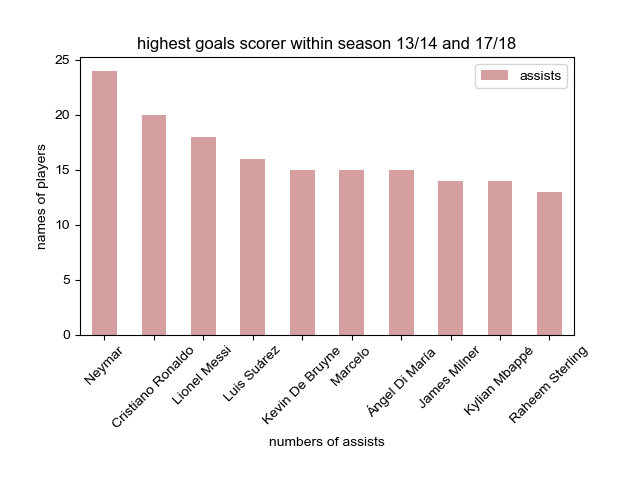

Text(0.5, 1.0, 'highest goals scorer within season 13/14 and 17/18')

In [30]:
highest_assists.plot.bar(x='name',y='assists',alpha=0.45,color='brown')

x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.subplots_adjust(bottom=0.3)
plt.gca().set_xlabel('numbers of assists')
plt.gca().set_ylabel('names of players')
plt.gca().set_title('highest goals scorer within season 13/14 and 17/18')


In [31]:
#highest goal 2013/14 season
season13 =uefa_df[uefa_df['season year']== '13/14']
season13=season13.set_index('name')
season13.head()

,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
name,,,,,,,,,,,,,,,
Robin van Persie,13/14,manchester-united,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,6,0.0,0.0
Ashley Cole,13/14,chelsea,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,414,0.0,5,1.0,0.0
Roman Weidenfeller,13/14,borussia-dortmund,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,765,0.0,9,0.0,1.0
Sebastian Kehl,13/14,borussia-dortmund,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,422,0.0,5,3.0,0.0
Daniel Braaten,13/14,fc-kobenhavn,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,330,0.0,4,1.0,0.0


In [32]:
#season13.info()

In [33]:
print(season13.shape)

(808, 15)


In [34]:
hg_season13= season13.groupby('name',as_index=False)['goals'].sum().nlargest(10,'goals')
hg_season13.head()
#after setting name as an index
#season13.loc['Cristiano Ronaldo']


,goals
134,17
792,10
178,8
437,8
259,6


In [35]:
#to calculate mins per goal 13/14 season
season13['minspergoal'] = season13['minutes played']/season13['goals'].astype(int)
season13.head()



,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards,minspergoal
name,,,,,,,,,,,,,,,,
Robin van Persie,13/14,manchester-united,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,6,0.0,0.0,0.0
Ashley Cole,13/14,chelsea,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,414,0.0,5,1.0,0.0,inf
Roman Weidenfeller,13/14,borussia-dortmund,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,765,0.0,9,0.0,1.0,inf
Sebastian Kehl,13/14,borussia-dortmund,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,422,0.0,5,3.0,0.0,422.0
Daniel Braaten,13/14,fc-kobenhavn,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,330,0.0,4,1.0,0.0,330.0


In [36]:
season13=season13[['goals','minspergoal']].nlargest(10,'goals')
season13.head(100)
season13.head()

,goals,minspergoal
name,,
Cristiano Ronaldo,17,58.411765
Zlatan Ibrahimović,10,67.000000
Lionel Messi,8,78.750000
Diego Costa,8,72.625000
Gareth Bale,6,145.500000


<IPython.core.display.Javascript object>


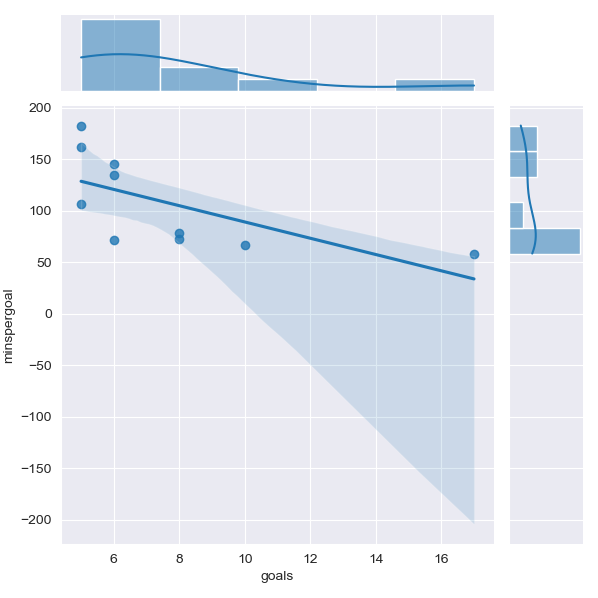

In [37]:
sns.set_style('darkgrid')
sns.jointplot(x='goals',y='minspergoal',data=season13,kind='reg');

In [38]:
"""
players with the highest G+A in 17/18 season
players with the highest hatrick from season 13/14 to 17/18 using barh
which club has the highest average number of goals from season 13/14 to 20/21 using a boxplot
correlation between the highest goal scorer and the lowest goal scorer from season 13/14 to 20/21 using df.plot
number of players that scored goals that ranges in tens using hist kde

"""

'\nplayers with the highest G+A in 17/18 season\nplayers with the highest hatrick from season 13/14 to 17/18 using barh\nwhich club has the highest average number of goals from season 13/14 to 20/21 using a boxplot\ncorrelation between the highest goal scorer and the lowest goal scorer from season 13/14 to 20/21 using df.plot\nnumber of players that scored goals that ranges in tens using hist kde\n\n'

In [39]:
#from season 17/18
#player with the highest G+A in 17/18 season
season18 = uefa_df[uefa_df['season year'] == '17/18']
#season18 = season18.set_index('season year')
season18.head()

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Roman Weidenfeller,17/18,borussia-dortmund,0.000000,0,0.0,3.0,66.666667,0.0,0.0,0.0,1,0.0,1,0.0,0.0
Champions league,Gonzalo Castro,17/18,borussia-dortmund,6.700000,0,1.0,109.0,89.908257,1.0,0.0,0.0,132,2.0,3,1.0,0.0
Champions league,Diego Benaglio,17/18,as-monaco,6.333333,0,0.0,58.0,63.793103,0.0,0.0,0.0,270,0.0,3,0.0,0.0
Champions league,Cesc Fàbregas,17/18,chelsea,7.462500,1,1.0,516.0,82.364341,2.0,5.0,3.0,691,4.0,8,0.0,0.0
Champions league,Cristiano Ronaldo,17/18,juventus,8.092308,15,3.0,387.0,81.395349,22.0,69.0,34.0,1170,6.0,13,2.0,0.0


In [40]:
season18_ga = season18['goals']+season18['assists']
season18_ga.head()


tournament
Champions league     0.0
Champions league     1.0
Champions league     0.0
Champions league     2.0
Champions league    18.0
dtype: float64

In [41]:
season18['goals+assists']=season18_ga
season18.head()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_13752\3672083382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season18['goals+assists']=season18_ga


,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards,goals+assists
tournament,,,,,,,,,,,,,,,,,
Champions league,Roman Weidenfeller,17/18,borussia-dortmund,0.000000,0,0.0,3.0,66.666667,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0
Champions league,Gonzalo Castro,17/18,borussia-dortmund,6.700000,0,1.0,109.0,89.908257,1.0,0.0,0.0,132,2.0,3,1.0,0.0,1.0
Champions league,Diego Benaglio,17/18,as-monaco,6.333333,0,0.0,58.0,63.793103,0.0,0.0,0.0,270,0.0,3,0.0,0.0,0.0
Champions league,Cesc Fàbregas,17/18,chelsea,7.462500,1,1.0,516.0,82.364341,2.0,5.0,3.0,691,4.0,8,0.0,0.0,2.0
Champions league,Cristiano Ronaldo,17/18,juventus,8.092308,15,3.0,387.0,81.395349,22.0,69.0,34.0,1170,6.0,13,2.0,0.0,18.0


In [42]:
season18= season18[['goals+assists','name']].nlargest(10,'goals+assists')
season18.head(10)

,goals+assists,name
tournament,,
Champions league,18.0,Cristiano Ronaldo
Champions league,17.0,Roberto Firmino
Champions league,14.0,Mohamed Salah
Champions league,11.0,Sadio Mané
Champions league,10.0,Edin Džeko
Champions league,9.0,Harry Kane
Champions league,9.0,Neymar
Champions league,8.0,James Milner
Champions league,8.0,Lionel Messi


<IPython.core.display.Javascript object>


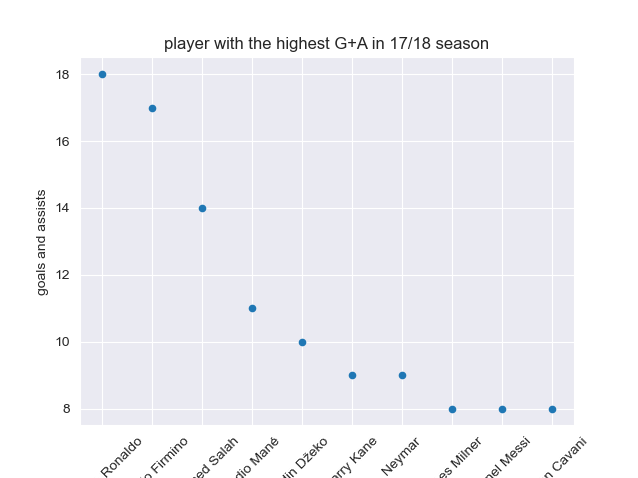

Text(0.5, 1.0, 'player with the highest G+A in 17/18 season')

In [43]:
season18.plot.scatter(x='name',y='goals+assists')
#sns.scatterplot(data=season18, x='name', y='goals+assists')

x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.gca().set_xlabel('names of players')
plt.gca().set_ylabel('goals and assists')
plt.gca().set_title('player with the highest G+A in 17/18 season')
#plt.rcparams['figure.figsize']=(20,8)
    
#plt.subplot_adjust(bottom=0.3)

In [44]:
uefa_df_avg = uefa_df.groupby('team', as_index=False)['goals'].mean().nlargest(10,'goals')
uefa_df_avg.head()

,team,goals
10,austria-wien,1.666667
8,athletic-bilbao,1.250000
59,milan,1.250000
15,bayern-munchen,1.248366
44,juventus,1.000000


<IPython.core.display.Javascript object>


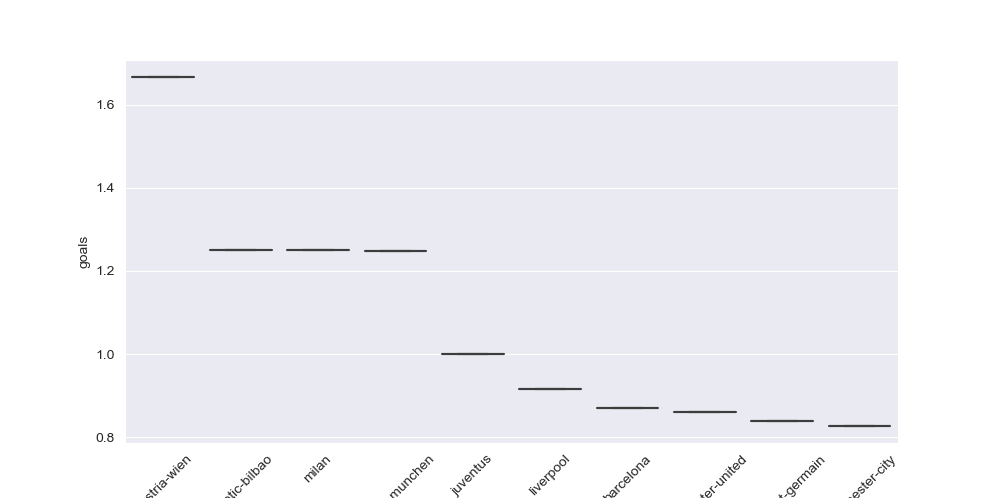

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'austria-wien'),
  Text(1, 0, 'athletic-bilbao'),
  Text(2, 0, 'milan'),
  Text(3, 0, 'bayern-munchen'),
  Text(4, 0, 'juventus'),
  Text(5, 0, 'liverpool'),
  Text(6, 0, 'barcelona'),
  Text(7, 0, 'manchester-united'),
  Text(8, 0, 'paris-saint-germain'),
  Text(9, 0, 'manchester-city')])

In [45]:
plt.figure(figsize=(10,5))
#plt.figure()
sns.boxplot(data=uefa_df_avg, x="team", y="goals")
plt.xticks(rotation=45)

#uefa_df.boxplot(x='team',y='goals')

In [46]:
#avg_goals=uefa_df.groupby('team').size()
#data = (uefa_df.groupby('team')['goals'].sum())/avg_goals
#data1=data.sort_values(ascending=False)
#data1.head()


In [47]:
uefa_df.head()

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Robin van Persie,13/14,manchester-united,0.00,4,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,6,0.0,0.0
Champions league,Ashley Cole,13/14,chelsea,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,414,0.0,5,1.0,0.0
Champions league,José Antonio Reyes,15/16,sevilla,7.25,0,0.0,84.0,69.047619,1.0,2.0,0.0,162,2.0,2,1.0,0.0
Champions league,Roman Weidenfeller,13/14,borussia-dortmund,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,765,0.0,9,0.0,1.0
Champions league,Roman Weidenfeller,14/15,borussia-dortmund,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,630,0.0,7,0.0,0.0


In [48]:
#def min_max(row):
 #   data = row[['minutes played','appearances']]
  #  row['max'] = np.max(data)
   # row['min'] = np.min(data)

    #return row
#uefa_df.apply(min_max, axis='columns').head()

In [49]:
season13

,goals,minspergoal
name,,
Cristiano Ronaldo,17,58.411765
Zlatan Ibrahimović,10,67.000000
Lionel Messi,8,78.750000
Diego Costa,8,72.625000
Gareth Bale,6,145.500000
Sergio Agüero,6,71.833333
Robert Lewandowski,6,134.833333
Karim Benzema,5,182.600000
Marián Čišovský,5,162.000000


In [50]:
season13=season13[['goals']].nlargest(10,'goals')
season13.head()

,goals
name,
Cristiano Ronaldo,17
Zlatan Ibrahimović,10
Lionel Messi,8
Diego Costa,8
Gareth Bale,6


In [51]:
season18

,goals+assists,name
tournament,,
Champions league,18.0,Cristiano Ronaldo
Champions league,17.0,Roberto Firmino
Champions league,14.0,Mohamed Salah
Champions league,11.0,Sadio Mané
Champions league,10.0,Edin Džeko
Champions league,9.0,Harry Kane
Champions league,9.0,Neymar
Champions league,8.0,James Milner
Champions league,8.0,Lionel Messi


In [52]:
season133=season13.describe()

In [53]:
season14 = uefa_df[uefa_df['season year']=='14/15']
season14
season15 = uefa_df[uefa_df['season year']=='15/16']
#season15
season16 = uefa_df[uefa_df['season year']=='16/17']
#season16
season17 = uefa_df[uefa_df['season year']=='17/18']
#season17
season18 = uefa_df[uefa_df['season year']=='18/19']
#season18
season19 = uefa_df[uefa_df['season year']=='19/20']
#season19
season20 = uefa_df[uefa_df['season year']=='20/21']
#season20.head()

In [54]:
season20g=season20.loc[(season20['goals'] == 4)]
#season20.loc[(season20['goals'] == 4) & (season20['shots on target'] >= 3)]
#season20.loc[season20['goals'].isin([3,4,2])]
season20gg=season20g.nlargest(1,'shots on target')
season20gg

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Erling Braut Haaland,20/21,borussia-dortmund,7.9,4,0.0,54.0,70.37037,5.0,11.0,8.0,264,0.0,3,0.0,0.0


In [55]:
season14g=season14=season14.loc[(season14['goals']== 10)] #.nlargest(1,'assists')] # & (season14['name']=='lionel Messi')]
season14gg=season14g.nlargest(1,'assists')
season14gg

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Lionel Messi,14/15,barcelona,0.0,10,5.0,0.0,0.0,0.0,0.0,0.0,1147,0.0,13,1.0,0.0


In [56]:
season15g=season15=season15.loc[(season15['goals']==16)]
season15g

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Cristiano Ronaldo,15/16,juventus,8.116667,16,4.0,411.0,83.454988,8.0,66.0,39.0,1109,12.0,12,1.0,0.0


In [57]:
season16g=season16.loc[(season16['goals']==12)]
season16g

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Cristiano Ronaldo,16/17,juventus,7.846154,12,5.0,412.0,87.135922,15.0,53.0,27.0,1200,9.0,13,1.0,0.0


In [58]:
season17g=season17.loc[(season17['goals']==15)]
season17g

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Cristiano Ronaldo,17/18,juventus,8.092308,15,3.0,387.0,81.395349,22.0,69.0,34.0,1170,6.0,13,2.0,0.0


In [59]:
season18g=season18.loc[(season18['goals']==12)]
season18g

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Lionel Messi,18/19,barcelona,8.9,12,3.0,593.0,84.485666,35.0,44.0,26.0,837,8.0,10,0.0,0.0


In [60]:
season19g=season19.loc[(season19['goals']==15)]
season19g

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Robert Lewandowski,19/20,bayern-munchen,8.35,15,5.0,248.0,78.629032,12.0,43.0,33.0,887,11.0,10,0.0,0.0


In [61]:
season13g=season13.loc[(season13['goals']==17)]
season13g

,goals
name,
Cristiano Ronaldo,17


In [62]:
#dataframes available for merging
season13g
season14gg
season15g
season16g
season17g
season18g
season19g
season20gg

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
tournament,,,,,,,,,,,,,,,,
Champions league,Erling Braut Haaland,20/21,borussia-dortmund,7.9,4,0.0,54.0,70.37037,5.0,11.0,8.0,264,0.0,3,0.0,0.0


In [63]:
#merging the dataframes

frames=[season13g,season14gg,season15g,season16g,season17g,season18g,season19g,season20gg]
allseason=pd.concat(frames)
allseason.fillna(0)

,goals,name,season year,team,rating,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards
Cristiano Ronaldo,17,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Champions league,10,Lionel Messi,14/15,barcelona,0.000000,5.0,0.0,0.000000,0.0,0.0,0.0,1147.0,0.0,13.0,1.0,0.0
Champions league,16,Cristiano Ronaldo,15/16,juventus,8.116667,4.0,411.0,83.454988,8.0,66.0,39.0,1109.0,12.0,12.0,1.0,0.0
Champions league,12,Cristiano Ronaldo,16/17,juventus,7.846154,5.0,412.0,87.135922,15.0,53.0,27.0,1200.0,9.0,13.0,1.0,0.0
Champions league,15,Cristiano Ronaldo,17/18,juventus,8.092308,3.0,387.0,81.395349,22.0,69.0,34.0,1170.0,6.0,13.0,2.0,0.0
Champions league,12,Lionel Messi,18/19,barcelona,8.900000,3.0,593.0,84.485666,35.0,44.0,26.0,837.0,8.0,10.0,0.0,0.0
Champions league,15,Robert Lewandowski,19/20,bayern-munchen,8.350000,5.0,248.0,78.629032,12.0,43.0,33.0,887.0,11.0,10.0,0.0,0.0
Champions league,4,Erling Braut Haaland,20/21,borussia-dortmund,7.900000,0.0,54.0,70.370370,5.0,11.0,8.0,264.0,0.0,3.0,0.0,0.0


In [64]:
allseason = allseason[['name','goals','shots on target','season year']]
allseason.set_index('season year')
allseason.fillna(0)


,name,goals,shots on target,season year
Cristiano Ronaldo,0,17,0.0,0
Champions league,Lionel Messi,10,0.0,14/15
Champions league,Cristiano Ronaldo,16,39.0,15/16
Champions league,Cristiano Ronaldo,12,27.0,16/17
Champions league,Cristiano Ronaldo,15,34.0,17/18
Champions league,Lionel Messi,12,26.0,18/19
Champions league,Robert Lewandowski,15,33.0,19/20
Champions league,Erling Braut Haaland,4,8.0,20/21


In [65]:

#all=allseason[(allseason['shots on target'] != 5) & (allseason['shots on target'] != 6) & (allseason['shots on target'] !=8)]
#all

<IPython.core.display.Javascript object>


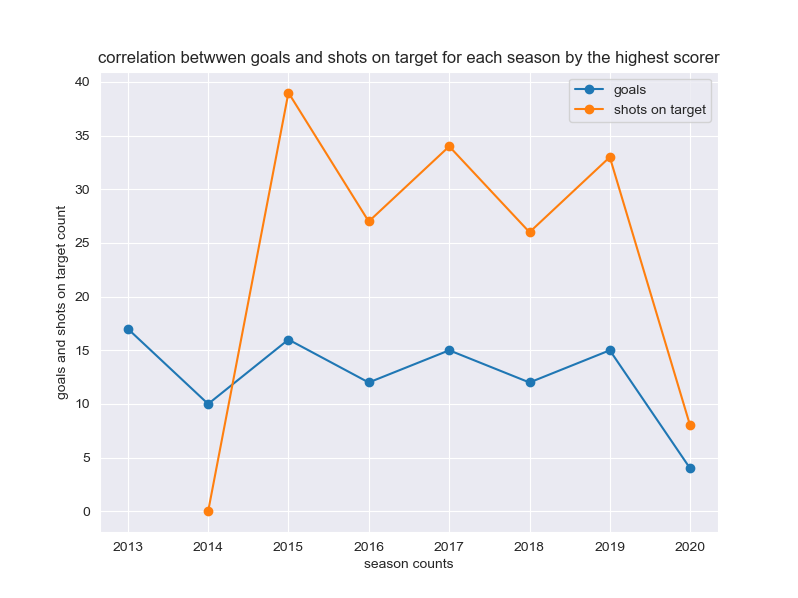

In [66]:
plt.figure(figsize=(8,6))
linear_data=np.arange('2013','2021',dtype='datetime64[Y]');
plt.plot(linear_data,allseason['goals'],'-o', linear_data,allseason['shots on target'],'-o')
plt.xlabel('season counts')
plt.ylabel('goals and shots on target count')
plt.title('correlation betwwen goals and shots on target for each season by the highest scorer')
plt.legend(['goals','shots on target','legend'])


In [67]:
allseason=allseason[['name','goals','appearances','minutes played']]
allseason.fillna(0)

KeyError: "['appearances', 'minutes played'] not in index"

In [68]:

allseason1=allseason.loc[(allseason['goals']<=16)]
allseason1

,name,goals,shots on target,season year
Champions league,Lionel Messi,10,0.0,14/15
Champions league,Cristiano Ronaldo,16,39.0,15/16
Champions league,Cristiano Ronaldo,12,27.0,16/17
Champions league,Cristiano Ronaldo,15,34.0,17/18
Champions league,Lionel Messi,12,26.0,18/19
Champions league,Robert Lewandowski,15,33.0,19/20
Champions league,Erling Braut Haaland,4,8.0,20/21


In [ ]:
uefa_df.head()

In [69]:
#grouping the number goals in tiers

def goals_category(goal):
    if (goal >=1) & (goal <= 3):
        return 'lowest tier goal scorer'
    elif (goal >=4) & (goal <= 6):
        return '4th tier goal scorer'
    elif (goal >=7) & (goal <=11):
        return '3rd tier goal scorer'
    elif (goal >= 12) & (goal <= 15):
        return '2nd tier goal scorer'
    elif (goal >=16):
        return '1st tier goal scorer'
uefa_df['goals_ranking'] = uefa_df['goals'].apply(lambda x: goals_category(x))
uefa_df.head()
    

,name,season year,team,rating,goals,assists,total passes,accurate passes%,successfuldribbles,total shots,shots on target,minutes played,fouls,appearances,yellowcards,redcards,goals_ranking
tournament,,,,,,,,,,,,,,,,,
Champions league,Robin van Persie,13/14,manchester-united,0.00,4,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0,6,0.0,0.0,4th tier goal scorer
Champions league,Ashley Cole,13/14,chelsea,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,414,0.0,5,1.0,0.0,None
Champions league,José Antonio Reyes,15/16,sevilla,7.25,0,0.0,84.0,69.047619,1.0,2.0,0.0,162,2.0,2,1.0,0.0,None
Champions league,Roman Weidenfeller,13/14,borussia-dortmund,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,765,0.0,9,0.0,1.0,None
Champions league,Roman Weidenfeller,14/15,borussia-dortmund,0.00,0,0.0,0.0,0.000000,0.0,0.0,0.0,630,0.0,7,0.0,0.0,None


In [70]:
uefa_df1=uefa_df.groupby('goals_ranking',as_index=False)['goals'].sum().nlargest(6,'goals')
uefa_df1

,goals_ranking,goals
4,lowest tier goal scorer,1946
3,4th tier goal scorer,613
2,3rd tier goal scorer,247
1,2nd tier goal scorer,54
0,1st tier goal scorer,33


In [72]:

uefa_df1['percent']= uefa_df1['goals']/uefa_df1['goals'].sum()*100
uefa_df1['percent'] = uefa_df1['percent'].astype(int)
uefa_df1

,goals_ranking,goals,percent
4,lowest tier goal scorer,1946,67
3,4th tier goal scorer,613,21
2,3rd tier goal scorer,247,8
1,2nd tier goal scorer,54,1
0,1st tier goal scorer,33,1


<IPython.core.display.Javascript object>


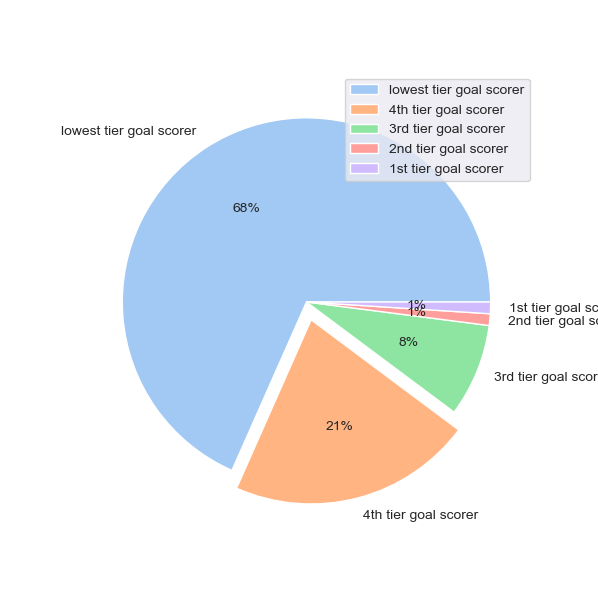

In [74]:
plt.figure(figsize=(6,6))
data=uefa_df1['percent']
label=uefa_df1['goals_ranking']
explode = [0,0.1,0,0,0]
palette_color = sns.color_palette('pastel')
plt.pie(data, labels=label, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.legend(loc=1)
plt.show()